## Introduction

Financial markets are fundamental institutions in any developing economy. They
play a crucial role in promoting economic growth by facilitating the channeling of
saving decisions into productive investment. A major concern for financial
institutions is credit risk, because if not managed properly, it can lead to a
banking collapse.
In our banking system, banks have many products to sell but the main source of
income of any bank is on its credit line. Loan is the core business part of banks.
A bank's profit or a loss depends to a large extent on loans i.e. whether the
customers are paying back the loan or defaulting.
Though a lot of people are applying for loans. However, they may have some
difficulty in repaying the loan, due to their own capability to repay loan, their
personal monetary terms, etc.. It’s hard to select the genuine applicant, who will
repay the loan. While doing the process manually, a lot of misconception may
happen to select the genuine applicant. The banks hold the risk of losing the
amount loaned to the borrowers, which is basically regarded as "Credit risk".
Credit risk is the potential that a bank’s borrower or counterparty fails to meet its
obligations in repaying the loan borrowed from the financial institutions ("banks").
By predicting the loan defaulters, the bank can reduce its Non-Performing
Assets. This makes the study of this phenomenon very important.
Thus, the banks need to manage the credit risks in their portfolio both at the
individual borrower and transactional level, as well as to consider the linkage
between credit risks and other types of risk. This is because these are criteria to
assess the success/failure of any banking lending activities.
Many research confirmed that machine learning technology is highly efficient to
predict this situation. This technique is applied through learning from previous
data.


### Objective - Our objective is to perform Exploratory Data Analysis(EDA) on the given dataset to learn the patterns and identify the "Credit risk".

## Step - 1: Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
## Dimensionality check

df.shape

(32581, 12)

### Observation - Here we can see the dataset contains rows- 32581 and columns- 12 using shape parameter

In [4]:
## Column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
## Checking null values

df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Observation - Here we can see the dataset contains some null values in person_emp_length and loan_int_rate columns

In [6]:
# Imputing NaN values with median

df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace = True)

In [7]:
# Dropped null values from person_emp_length column

df.dropna(inplace=True)

In [8]:
## Checking null values

df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Observation - As checked there is no missing values present in the dataset

In [9]:
## Statistical Analysis

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.037157,0.215426,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070128,0.411124,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,31686.0,27.747302,6.360283,20.00,23.00,26.000000,30.00,144.00
person_income,31686.0,66691.878306,62427.286689,4000.00,39397.00,56000.000000,80000.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.000000,7.00,123.00
loan_amnt,31686.0,9661.337815,6336.226458,500.00,5000.00,8000.000000,12500.00,35000.00
loan_int_rate,31686.0,11.037157,3.070128,5.42,8.49,11.011695,13.16,23.22
loan_status,31686.0,0.215426,0.411124,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,31686.0,0.169612,0.106297,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,31686.0,5.809316,4.060867,2.00,3.00,4.000000,8.00,30.00


In [11]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,31686,31686,31686,31686
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16076,6290,10371,26057


### Observation - As checked there is some outliers present in the person_income and loan_amnt column

### Outlier Treatment

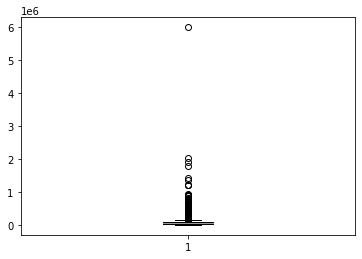

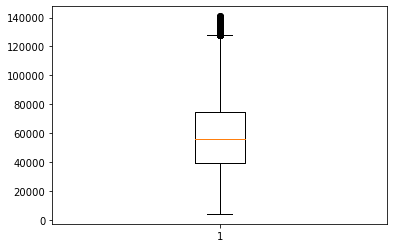

In [12]:
plt.boxplot(df['person_income'])
plt.show()

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    
    for x in df[col]:
        if x < lb or x > ub:
            df[col] = df[col].replace(x, np.median(df[col]))
        

outliers(df, "person_income")        
plt.boxplot(df["person_income"])
plt.show()

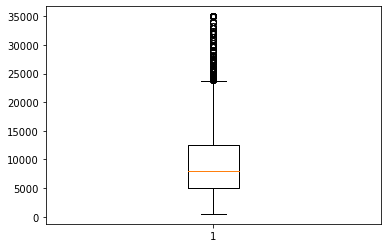

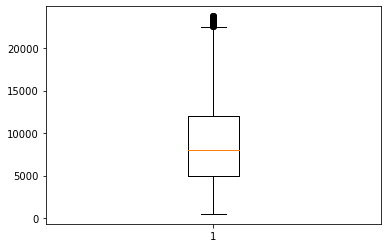

In [13]:
plt.boxplot(df['loan_amnt'])
plt.show()

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    
    for x in df[col]:
        if x < lb or x > ub:
            df[col] = df[col].replace(x, np.median(df[col]))
        

outliers(df, "loan_amnt")        
plt.boxplot(df["loan_amnt"])
plt.show()

### Step - 2: Document the below mentioned points properly:
- Identify the input and output/target variables.
- Identify the type of ML Task.
- Identify the Evaluation Metric.
- For regression task - Mean Absolute Error
- For classification task - Accuracy

### 1. Identify the input and output/target variables.

In [14]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
# Identifying the inputs variables as (X) and target variable as (y)

y = df['loan_status']

X = df.drop('loan_status', axis = 'columns')

In [16]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,8000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,8000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,8000,14.27,0.55,Y,4


In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

### Observation - As per the dataset our task is to find (default or non default) here's the column have information about defaulter which is loan status so this is our target variable and rest of the columns are input variables 

### 2. Identify the type of ML Task.

In [18]:
df['loan_status'].value_counts()

0    24860
1     6826
Name: loan_status, dtype: int64

### Observation - As per the dataset the target variable is loan status which in binary classification (i.e - 0 non default or 1 default) so here our ML task is classification. 

### 3. Identify the Evaluation Metric.

In [19]:
df['loan_status'].value_counts()

0    24860
1     6826
Name: loan_status, dtype: int64

### Observation - As per the observation our ML task is classification so here Evaluation Metric is Accuracy

## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).


In [20]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0) 

In [21]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(23764, 11) (23764,)
(7922, 11) (7922,)


## Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

### Separating Categorical and Numerical Columns of Training set:

In [22]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [23]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
3313,25,36000,5.0,6000,7.88,0.17,4
25851,30,91000,9.0,18500,12.42,0.20,7
18693,30,54000,2.0,16200,15.57,0.30,10
21899,29,50004,1.0,1500,13.11,0.03,6
9452,26,82000,5.0,8000,10.99,0.10,3


In [24]:
# scaling the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
3313,-0.422571,-0.857736,0.051676,-0.552547,-1.023082,0.001344,-0.441602
25851,0.354311,1.201878,1.007713,1.993916,0.452146,0.283931,0.293751
18693,0.354311,-0.183680,-0.665352,1.525367,1.475708,1.225887,1.029105
21899,0.198935,-0.333321,-0.904361,-1.469274,0.676355,-1.317395,0.048634
9452,-0.267194,0.864850,0.051676,-0.145113,-0.012518,-0.658026,-0.686720


In [25]:
X_train_cat = X_train.select_dtypes(include = ['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
3313,MORTGAGE,PERSONAL,A,N
25851,MORTGAGE,DEBTCONSOLIDATION,B,N
18693,RENT,DEBTCONSOLIDATION,D,N
21899,MORTGAGE,HOMEIMPROVEMENT,C,Y
9452,RENT,VENTURE,B,N


In [26]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train_cat['person_home_ownership'] = le.fit_transform(X_train['person_home_ownership'])
X_train_cat['loan_intent'] = le.fit_transform(X_train['loan_intent'])
X_train_cat['loan_grade'] = le.fit_transform(X_train['loan_grade'])
X_train_cat['cb_person_default_on_file'] = le.fit_transform(X_train['cb_person_default_on_file'])

In [27]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
3313,0,4,0,0
25851,0,0,1,0
18693,3,0,3,0
21899,0,2,2,1
9452,3,5,1,0


In [28]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis = 1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
3313,-0.422571,-0.857736,0.051676,-0.552547,-1.023082,0.001344,-0.441602,0,4,0,0
25851,0.354311,1.201878,1.007713,1.993916,0.452146,0.283931,0.293751,0,0,1,0
18693,0.354311,-0.183680,-0.665352,1.525367,1.475708,1.225887,1.029105,3,0,3,0
21899,0.198935,-0.333321,-0.904361,-1.469274,0.676355,-1.317395,0.048634,0,2,2,1
9452,-0.267194,0.864850,0.051676,-0.145113,-0.012518,-0.658026,-0.686720,3,5,1,0


## Step - 5: Data preparation on train data:

- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [29]:
X_test_num = X_test.select_dtypes(include = ['int64','float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26073,35,83234,19.0,10000,18.250000,0.12,9
22,22,65000,4.0,8000,17.580000,0.52,4
23440,29,62500,13.0,5000,11.360000,0.08,7
32024,38,20004,2.0,6250,11.011695,0.31,15
908,22,54000,6.0,19000,11.011695,0.35,4


In [30]:
# Scaling the Numericals Features for test

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26073,1.131193,0.911061,3.397805,0.262321,2.346547,-0.469634,0.783987
22,-0.888700,0.228243,-0.187333,-0.145113,2.128837,3.298191,-0.441602
23440,0.198935,0.134624,1.963750,-0.756264,0.107710,-0.846417,0.293751
32024,1.597322,-1.456746,-0.665352,-0.501618,-0.005469,1.320083,2.254693
908,-0.888700,-0.183680,0.290685,2.095775,-0.005469,1.696865,-0.441602


In [31]:
X_test_cat = X_test.select_dtypes(include = ['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26073,MORTGAGE,DEBTCONSOLIDATION,D,Y
22,RENT,EDUCATION,D,N
23440,MORTGAGE,DEBTCONSOLIDATION,B,N
32024,OWN,HOMEIMPROVEMENT,B,N
908,RENT,VENTURE,A,N


In [32]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_test_cat['person_home_ownership'] = le.fit_transform(X_test['person_home_ownership'])
X_test_cat['loan_intent'] = le.fit_transform(X_test['loan_intent'])
X_test_cat['loan_grade'] = le.fit_transform(X_test['loan_grade'])
X_test_cat['cb_person_default_on_file'] = le.fit_transform(X_test['cb_person_default_on_file'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26073,0,0,3,1
22,3,1,3,0
23440,0,0,1,0
32024,2,2,1,0
908,3,5,0,0


In [33]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis = 1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26073,1.131193,0.911061,3.397805,0.262321,2.346547,-0.469634,0.783987,0,0,3,1
22,-0.888700,0.228243,-0.187333,-0.145113,2.128837,3.298191,-0.441602,3,1,3,0
23440,0.198935,0.134624,1.963750,-0.756264,0.107710,-0.846417,0.293751,0,0,1,0
32024,1.597322,-1.456746,-0.665352,-0.501618,-0.005469,1.320083,2.254693,2,2,1,0
908,-0.888700,-0.183680,0.290685,2.095775,-0.005469,1.696865,-0.441602,3,5,0,0


## Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

## Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

## 1. KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_transformed, y_train)

y_test_pred = knn.predict(X_test_transformed)

y_train_pred = knn.predict(X_train_transformed)

knn_ac_test = accuracy_score(y_test, y_test_pred)

knn_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", knn_ac_train)
print("Test Accuracy ", knn_ac_test)

Training Accuracy :  0.9157970038714022
Test Accuracy  0.8905579399141631


## 2. Logestic Regresion

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_transformed, y_train)

y_test_pred = lr.predict(X_test_transformed)

y_train_pred = lr.predict(X_train_transformed)

lr_ac_test = accuracy_score(y_test, y_test_pred)

lr_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", lr_ac_train)
print("Test Accuracy ", lr_ac_test)

Training Accuracy :  0.8479633058407675
Test Accuracy  0.8471345619792982


## 3. Support Vector Machine

In [37]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_transformed, y_train)

y_test_pred = svm.predict(X_test_transformed)

y_train_pred = svm.predict(X_train_transformed)

svm_ac_test = accuracy_score(y_test, y_test_pred)

svm_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", svm_ac_train)
print("Test Accuracy ", svm_ac_test)

Training Accuracy :  0.8924844302306009
Test Accuracy  0.8896743246654885


## 4. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_transformed, y_train)

y_test_pred = dt.predict(X_test_transformed)

y_train_pred = dt.predict(X_train_transformed)

dt_ac_test = accuracy_score(y_test, y_test_pred)

dt_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", dt_ac_train)
print("Test Accuracy ", dt_ac_test)

Training Accuracy :  1.0
Test Accuracy  0.8908104014137844


## 5. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_transformed, y_train)

y_test_pred = rf.predict(X_test_transformed)

y_train_pred = rf.predict(X_train_transformed)

rf_ac_test = accuracy_score(y_test, y_test_pred)

rf_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", rf_ac_train)
print("Test Accuracy ", rf_ac_test)

Training Accuracy :  1.0
Test Accuracy  0.9291845493562232


## Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.

In [40]:
x = {'K Nearest Neighbour': knn_ac_test, 'Logistic Regression' : lr_ac_test, 'Support Vector Machine' : svm_ac_test,'Decision tree' : dt_ac_test, 'Random Forest' : rf_ac_test}

x

{'K Nearest Neighbour': 0.8905579399141631,
 'Logistic Regression': 0.8471345619792982,
 'Support Vector Machine': 0.8896743246654885,
 'Decision tree': 0.8471345619792982,
 'Random Forest': 0.9291845493562232}

In [41]:
accuracy = pd.DataFrame.from_dict(x, orient='index', columns=['accuracy'])

accuracy

,accuracy
K Nearest Neighbour,0.890558
Logistic Regression,0.847135
Support Vector Machine,0.889674
Decision tree,0.847135
Random Forest,0.929185


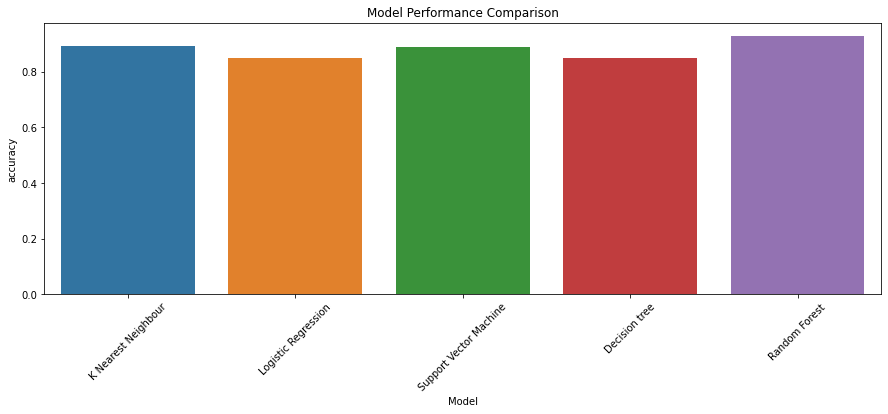

In [42]:
plt.figure(figsize=(15,5))

sns.barplot(x = accuracy.index , y = accuracy['accuracy'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

plt.xticks(rotation=45)

plt.show()

### Conclusion - As per the above bar plot of all the models accurcay comaparison Random Forest has given the best accuracy on the Banking domain dataset and it is the best algorithm for CreditRisk Scoring